In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

# Movies

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Ratings

In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
ratings = ratings.drop("timestamp", axis = 1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
ratings.shape

(100836, 3)

In [7]:
# Đếm số lượng user đánh giá mỗi movie
movie_counts = ratings['movieId'].value_counts()
movie_counts

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
135534      1
Name: count, Length: 9724, dtype: int64

In [8]:
# Đếm số lượng đánh giá của từng userId
user_counts = ratings['userId'].value_counts()
user_counts

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
278      20
147      20
320      20
53       20
Name: count, Length: 610, dtype: int64

## Loại bỏ những bộ phim được số lượng người dùng đánh giá <10

In [9]:
movie_counts = movie_counts[movie_counts >= 10]
movie_counts

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4167       10
50794      10
4255       10
1147       10
120466     10
Name: count, Length: 2269, dtype: int64

In [10]:
ratings = ratings[ratings['movieId'].isin(movie_counts.index)]
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100818,610,159093,3.0
100829,610,164179,5.0
100830,610,166528,4.0
100833,610,168250,5.0


## loại bỏ những user đánh giá ít hơn 50 bộ phim

In [11]:
# Đếm số lượng đánh giá của từng userId
user_counts = ratings['userId'].value_counts()
user_counts

userId
414    1634
599    1368
68     1085
474    1077
448    1017
       ... 
499      15
598      14
324      13
578      11
175       7
Name: count, Length: 610, dtype: int64

In [12]:
#xóa những người dùng đánh giá nhỏ hơn 50 bộ phim.
valid_users = user_counts[user_counts >= 50]
valid_users

userId
414    1634
599    1368
68     1085
474    1077
448    1017
       ... 
262      50
170      50
457      50
303      50
88       50
Name: count, Length: 367, dtype: int64

In [13]:
ratings = ratings[ratings['userId'].isin(valid_users.index)]
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100818,610,159093,3.0
100829,610,164179,5.0
100830,610,166528,4.0
100833,610,168250,5.0


In [14]:
u_counts = ratings['userId'].value_counts()
u_counts

userId
414    1634
599    1368
68     1085
474    1077
448    1017
       ... 
303      50
262      50
457      50
512      50
36       50
Name: count, Length: 367, dtype: int64

In [15]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100818,610,159093,3.0
100829,610,164179,5.0
100830,610,166528,4.0
100833,610,168250,5.0


# Xây dựng ma trận và chuẩn hóa ma trận

In [16]:
movie_user_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
movie_user_matrix

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,NaN,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
movie_user_matrix.shape

(367, 2269)

In [18]:
movie_mean = movie_user_matrix.mean(axis=0)
movie_mean

movieId
1         3.877193
2         3.441176
3         3.261905
5         2.971429
6         3.928571
            ...   
174055    3.545455
176371    4.000000
177765    3.500000
179819    3.045455
187593    4.000000
Length: 2269, dtype: float64

In [19]:
normalized_utility_matrix_NaN = movie_user_matrix.sub(movie_mean, axis=1)
normalized_utility_matrix_NaN

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,0.122807,NaN,0.738095,NaN,0.071429,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.558824,1.738095,2.028571,0.071429,0.837838,NaN,-0.453704,0.346774,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.622807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.122807,0.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,-1.377193,NaN,NaN,NaN,NaN,-0.662162,NaN,NaN,-1.153226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,0.122807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.653226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
normalized_utility_matrix = normalized_utility_matrix_NaN.fillna(0)
normalized_utility_matrix

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,0.122807,0.000000,0.738095,0.000000,0.071429,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.558824,1.738095,2.028571,0.071429,0.837838,0.0,-0.453704,0.346774,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
7,0.622807,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.122807,0.058824,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
606,-1.377193,0.000000,0.000000,0.000000,0.000000,-0.662162,0.0,0.000000,-1.153226,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
607,0.122807,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.653226,0.0,...,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0


# Tính độ tương đồng giữa các movie

## cosine_similarity

In [21]:
movie_similarity_matrix = cosine_similarity(normalized_utility_matrix.T)
movie_similarity_matrix = pd.DataFrame(movie_similarity_matrix, index=normalized_utility_matrix.columns, columns=normalized_utility_matrix.columns)
print("\nMa trận tương đồng giữa các phim:\n")
movie_similarity_matrix


Ma trận tương đồng giữa các phim:



movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.167275,0.130949,0.084027,0.018362,0.056997,0.047789,-0.009744,0.062203,0.015188,...,0.089254,0.046515,0.069315,-0.010038,0.111425,0.155751,0.066175,0.158377,0.047386,0.032165
2,0.167275,1.000000,0.216603,0.147101,0.068316,0.077306,0.054114,0.026197,0.083102,0.098712,...,0.094227,0.060997,0.006910,0.023345,0.115684,0.052861,-0.013204,0.088050,0.027162,-0.041760
3,0.130949,0.216603,1.000000,0.261988,0.210166,0.199515,0.237909,-0.029575,0.104594,0.115187,...,0.000000,0.040850,0.009233,0.037576,0.066147,0.011031,0.117797,0.000000,0.029319,0.000000
5,0.084027,0.147101,0.261988,1.000000,0.059832,0.282232,0.106066,0.052459,0.105601,0.036904,...,0.022867,-0.014435,-0.014941,-0.026973,0.027201,-0.070276,-0.031268,0.000000,-0.047447,0.000000
6,0.018362,0.068316,0.210166,0.059832,1.000000,0.000198,-0.021505,0.198709,0.006525,0.035438,...,0.000000,0.033279,-0.009969,0.056050,0.071839,-0.044447,-0.057372,0.000000,-0.096951,-0.075775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.155751,0.052861,0.011031,-0.070276,-0.044447,-0.024935,-0.063367,-0.021796,0.058215,-0.022056,...,0.217457,-0.022856,0.086302,0.000876,-0.016366,1.000000,0.381279,0.333301,0.424290,0.231677
176371,0.066175,-0.013204,0.117797,-0.031268,-0.057372,0.045088,0.090221,-0.044156,0.078777,0.031403,...,-0.528017,-0.218765,-0.102396,-0.110153,-0.046603,0.381279,1.000000,-0.255883,-0.133791,0.074125
177765,0.158377,0.088050,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006524,0.059173,0.000000,...,0.625305,0.398973,0.341809,0.299171,0.070826,0.333301,-0.255883,1.000000,0.498594,0.144841


# Dự đoán

In [27]:
def pre(userId, movieId, k):
    if movieId not in movie_similarity_matrix.index:
        return None
    # tìm những movie đã được rating bởi userId
    rated_movies = normalized_utility_matrix.loc[userId]
    movie_ids = rated_movies[rated_movies != 0].index
    if movie_ids.empty:
        return None
    # lấy k giá trị tương đồng.
    sim_movies = movie_similarity_matrix.loc[movieId, movie_ids] 
    k_sim_movies = sim_movies.sort_values(ascending=False).head(k)
    
    k_normal_ratings_movieIds = normalized_utility_matrix.loc[userId, k_sim_movies.index]

    similarity_sum = 0 #Tổng trọng số của đánh giá ( = độ tương đồng * đánh giá)
    weighted_sum = 0 #Tổng các giá trị độ tương đồng
    for idx in k_sim_movies.index:
        similarity_sum += abs(k_sim_movies[idx])
        weighted_sum += k_sim_movies[idx] * k_normal_ratings_movieIds[idx]
        
    if similarity_sum == 0:
        return None
 
    predicted_rating = weighted_sum / similarity_sum
    predicted_rating += movie_mean[movieId]
    predicted_rating = min(5, max(1, predicted_rating))  # nếu thang điểm là từ 1 đến 5
    return predicted_rating

predict = pre(1, 2, 5)
predict

np.float64(4.173428956607638)

In [28]:
# recommend
def recommend_from_prec(userId, k):
    rated_movies = normalized_utility_matrix.loc[userId]
    rated_movies = rated_movies[rated_movies != 0].index  

    all_movies = normalized_utility_matrix.columns
    unrated_movies = [m for m in all_movies if m not in rated_movies]

    predicted_ratings = {}

    for movieId in unrated_movies:
        rating = pre(userId, movieId, k)
        if rating is not None:
            predicted_ratings[movieId] = rating

    # Sắp xếp theo rating giảm dần
    top_recommendations = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)

    recommend_df = pd.DataFrame(top_recommendations, columns=['movieId', 'predicted_rating'])
    recommend_df = recommend_df.merge(movies[['movieId', 'title']], on='movieId')
    recommend_series = pd.Series(data=recommend_df['predicted_rating'].values, index=recommend_df['title'])

    return recommend_series

recommend = recommend_from_prec(4, 10).head(10)
recommend

title
Wallace & Gromit: The Best of Aardman Animation (1996)                                                  5.000000
Secrets & Lies (1996)                                                                                   4.899698
All About Eve (1950)                                                                                    4.875327
Hustler, The (1961)                                                                                     4.821757
In the Heat of the Night (1967)                                                                         4.802012
Seven Pounds (2008)                                                                                     4.798988
Streetcar Named Desire, A (1951)                                                                        4.779041
Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)    4.760399
Iron Giant, The (1999)                                                                    

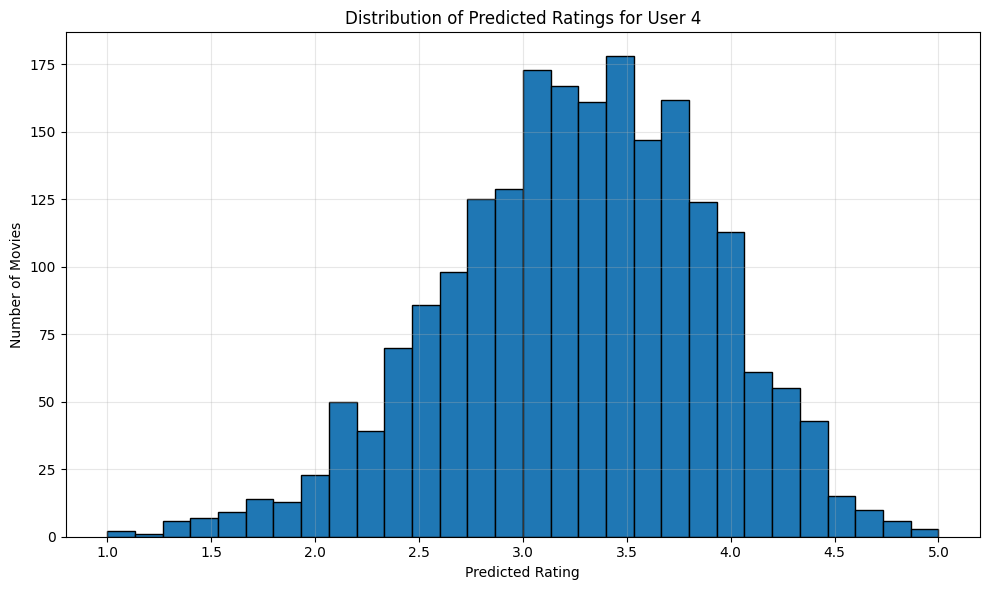

In [29]:
# Biểu đồ phân bố 

userId = 4  
k = 10    
recommend = recommend_from_prec(userId, k)

# Tạo histogram
plt.figure(figsize=(10, 6))
plt.hist(recommend, bins=30, edgecolor='black')  
plt.title(f'Distribution of Predicted Ratings for User {userId}')
plt.xlabel('Predicted Rating')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Đánh giá mô hình 

In [30]:
import gradio as gr
import pandas as pd

# Giả sử đây là danh sách user_id hợp lệ sau tiền xử lý
valid_user_ids = sorted(list(normalized_utility_matrix.index))  # hoặc index của ma trận bạn dùng

def get_recommendations(user_id: int, k: int, n: int):
    recs_series = recommend_from_prec(user_id, k).head(n)
    df = recs_series.reset_index()
    df.columns = ["Title", "Score"]
    df["Score"] = df["Score"].map(lambda x: f"{x:.2f}")
    return df

with gr.Blocks() as demo:
    gr.Markdown("## Movie Recommender 🎬")
    with gr.Row():
        user_id = gr.Dropdown(choices=valid_user_ids, label="User ID", value=valid_user_ids[0])
        k = gr.Slider(1, 50, value=10, step=1, label="Số hàng xóm (k)")
        n = gr.Slider(1, 50, value=10, step=1, label="Số phim đề xuất")
    btn = gr.Button("Lấy đề xuất")
    output = gr.DataFrame(headers=["Title", "Score"], label="Top Recommendations")
    btn.click(fn=get_recommendations, inputs=[user_id, k, n], outputs=output)

if __name__ == "__main__":
    demo.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

normalized_utility_matrix_train, movie_mean_train = update_normalized_utility_matrix(train_data)
movie_similarity_matrix_train = update_similarity(normalized_utility_matrix_train)

normalized_utility_matrix= normalized_utility_matrix_train
movie_mean= movie_mean_train
movie_similarity_matrix= movie_similarity_matrix_train

ValueError: too many values to unpack (expected 2)